# Assignment 1
**Credits**: Federico Ruggeri, Eleonora Mancini, Paolo Torroni

**Keywords**: Sexism Detection, Multi-class Classification, RNNs, Transformers, Huggingface



# Contact
For any doubt, question, issue or help, you can always contact us at the following email addresses:

Teaching Assistants:

- Federico Ruggeri -> federico.ruggeri6@unibo.it
- Eleonora Mancini -> e.mancini@unibo.it

Professor:
- Paolo Torroni -> p.torroni@unibo.it

# Introduction
You are asked to address the [EXIST 2023 Task 2](https://clef2023.clef-initiative.eu/index.php?page=Pages/labs.html#EXIST) on sexism detection.

## Problem Definition

This task aims to categorize the sexist messages according to the intention of the author in one of the following categories: (i) direct sexist message, (ii) reported sexist message and (iii) judgemental message.

### Examples:

#### DIRECT
The intention was to write a message that is sexist by itself or incites to be sexist, as in:

''*A woman needs love, to fill the fridge, if a man can give this to her in return for her services (housework, cooking, etc), I don’t see what else she needs.*''

#### REPORTED
The intention is to report and share a sexist situation suffered by a woman or women in first or third person, as in:

''*Today, one of my year 1 class pupils could not believe he’d lost a race against a girl.*''

#### JUDGEMENTAL
The intention was to judge, since the tweet describes sexist situations or behaviours with the aim of condemning them.

''*As usual, the woman was the one quitting her job for the family’s welfare…*''

# [Task 1 - 1.0 points] Corpus

We have preparared a small version of EXIST dataset in our dedicated [Github repository](https://github.com/lt-nlp-lab-unibo/nlp-course-material/tree/main/2025-2026/Assignment%201/data).

Check the `A1/data` folder. It contains 3 `.json` files representing `training`, `validation` and `test` sets.


### Dataset Description
- The dataset contains tweets in both English and Spanish.
- There are labels for multiple tasks, but we are focusing on **Task 2**.
- For Task 2, labels are assigned by six annotators.
- The labels for Task 2 represent whether the tweet is non-sexist ('-') or its sexist intention ('DIRECT', 'REPORTED', 'JUDGEMENTAL').







### Example

```
    "203260": {
        "id_EXIST": "203260",
        "lang": "en",
        "tweet": "ik when mandy says “you look like a whore” i look cute as FUCK",
        "number_annotators": 6,
        "annotators": ["Annotator_473", "Annotator_474", "Annotator_475", "Annotator_476", "Annotator_477", "Annotator_27"],
        "gender_annotators": ["F", "F", "M", "M", "M", "F"],
        "age_annotators": ["18-22", "23-45", "18-22", "23-45", "46+", "46+"],
        "labels_task1": ["YES", "YES", "YES", "NO", "YES", "YES"],
        "labels_task2": ["DIRECT", "DIRECT", "REPORTED", "-", "JUDGEMENTAL", "REPORTED"],
        "labels_task3": [
          ["STEREOTYPING-DOMINANCE"],
          ["OBJECTIFICATION"],
          ["SEXUAL-VIOLENCE"],
          ["-"],
          ["STEREOTYPING-DOMINANCE", "OBJECTIFICATION"],
          ["OBJECTIFICATION"]
        ],
        "split": "TRAIN_EN"
      }
    }
```

### Instructions
1. **Download** the `A1/data` folder.
2. **Load** the three JSON files and encode them as ``pandas.DataFrame``.
3. **Aggregate labels** for Task 2 using majority voting and store them in a new dataframe column called `label`. Items without a clear majority will be removed from the dataset.
4. **Filter the DataFrame** to keep only rows where the `lang` column is `'en'`.
5. **Remove unwanted columns**: Keep only `id_EXIST`, `lang`, `tweet`, and `label`.
6. **Encode the `label` column**: Use the following mapping

```
{
    '-': 0,
    'DIRECT': 1,
    'JUDGEMENTAL': 2,
    'REPORTED': 3
}
```

In [ ]:
# file management
import sys
import shutil
import urllib
import tarfile
from pathlib import Path

# dataframe management
import pandas as pd

# data manipulation
import numpy as np

# for readability
from typing import Iterable
from collections import Counter

# viz
from tqdm import tqdm

import random


In [ ]:
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0=all, 1=info, 2=warning, 3=error

# Suppress TensorFlow logging
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/training.json', orient='index')
val = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/validation.json', orient='index')
test = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/test.json', orient='index')

In [ ]:
def majority_vote(labels):
    """Apply majority voting to get the label with strict majority (>50%)"""
    if not isinstance(labels, list) or len(labels) == 0:
        return None
    top_label, freq = Counter(labels).most_common(1)[0]
    return top_label if freq > len(labels) / 2 else None

In [ ]:
# Label mapping for Task 2
label_map = {'-': 0, 'DIRECT': 1, 'JUDGEMENTAL': 2, 'REPORTED': 3}

# Process train, validation, and test sets
for name in ('train', 'val', 'test'):
    df = globals()[name].copy()

    # Step 1: Aggregate labels using majority voting
    df['label'] = df['labels_task2'].apply(majority_vote)

    # Remove items without a clear majority
    df = df.dropna(subset=['label'])

    # Step 2: Filter to keep only English rows
    df = df[df['lang'] == 'en']

    # Step 3: Keep only required columns
    df = df[['id_EXIST', 'lang', 'tweet', 'label']]

    # Step 4: Encode the label column
    df['label'] = df['label'].map(label_map)

    # Update the global variable
    globals()[name] = df.reset_index(drop=True)

print(f"Train set shape: {train.shape}")
print(f"Validation set shape: {val.shape}")
print(f"Test set shape: {test.shape}")
print(f"\nLabel distribution in train set:\n{train['label'].value_counts().sort_index()}")
train.head()

Train set shape: (2202, 4)
Validation set shape: (115, 4)
Test set shape: (217, 4)

Label distribution in train set:
label
0    1733
1     336
2      42
3      91
Name: count, dtype: int64


,id_EXIST,lang,tweet,label
0,200002,en,Writing a uni essay in my local pub with a cof...,3
1,200006,en,According to a customer I have plenty of time ...,3
2,200008,en,New to the shelves this week - looking forward...,0
3,200010,en,I guess that’s fairly normal for a Neanderthal...,0
4,200011,en,#EverydaySexism means women usually end up in ...,2


# [Task2 - 0.5 points] Data Cleaning
In the context of tweets, we have noisy and informal data that often includes unnecessary elements like emojis, hashtags, mentions, and URLs. These elements may interfere with the text analysis.



### Instructions
- **Remove emojis** from the tweets.
- **Remove hashtags** (e.g., `#example`).
- **Remove mentions** such as `@user`.
- **Remove URLs** from the tweets.
- **Remove special characters and symbols**.
- **Remove specific quote characters** (e.g., curly quotes).
- **Perform lemmatization** to reduce words to their base form.

In [ ]:
import re
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    """Convert treebank POS tags to WordNet POS tags for better lemmatization"""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN  # Default to noun

def clean_tweet(text):
    """Clean tweet text by removing noise and performing lemmatization"""
    if not isinstance(text, str):
        return text

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (@user)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (#example)
    text = re.sub(r'#\w+', '', text)

    # Remove emojis
    text = re.sub(r'[^\w\s\-\.\,\!\?\']', '', text)

    # Remove specific quote characters (curly quotes, etc.)
    text = re.sub(r'[""''`´]', '"', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove special characters and short tokens, then lemmatize
    cleaned_tokens = []
    pos_tags = nltk.pos_tag(tokens)

    for token, pos in pos_tags:
        # Skip if token is too short or only special characters
        if len(token) < 2:
            continue
        # Lemmatize using POS tag
        wordnet_pos = get_wordnet_pos(pos)
        lemmatized = lemmatizer.lemmatize(token, pos=wordnet_pos)
        cleaned_tokens.append(lemmatized)

    return ' '.join(cleaned_tokens)

# Apply cleaning to all datasets
for name in ('train', 'val', 'test'):
    print(f"Cleaning {name} set...")
    globals()[name]['tweet'] = globals()[name]['tweet'].apply(clean_tweet)

print("\nData cleaning completed!")
print(f"\nSample cleaned tweets from train set:")
for i in range(min(3, len(train))):
    print(f"{i+1}. {train['tweet'].iloc[i][:100]}...")


Cleaning train set...
Cleaning val set...
Cleaning test set...

Data cleaning completed!

Sample cleaned tweets from train set:
1. write uni essay in my local pub with coffee random old man keep ask me drunk question when 'm try to...
2. accord to customer have plenty of time to go spent the stirling coin he want to pay me with in derry...
3. new to the shelf this week look forward to read these book...


# [Task 3 - 0.5 points] Text Encoding
To train a neural sexism classifier, you first need to encode text into numerical format.




### Instructions

* Embed words using **GloVe embeddings**.
* You are **free** to pick any embedding dimension.





### What about OOV tokens?
   * All the tokens in the **training** set that are not in GloVe **must** be added to the vocabulary.
   * For the remaining tokens (i.e., OOV in the validation and test sets), you have to assign them a **special token** (e.g., ``<UNK>``) and a **static** embedding.
   * You are **free** to define the static embedding using any strategy (e.g., random, neighbourhood, etc...)



### More about OOV

For a given token:

* **If in train set**: add to vocabulary and assign an embedding (use GloVe if token in GloVe, custom embedding otherwise).
* **If in val/test set**: assign special token if not in vocabulary and assign custom embedding.

Your vocabulary **should**:

* Contain all tokens in train set; or
* Union of tokens in train set and in GloVe $\rightarrow$ we make use of existing knowledge!

In [ ]:
# Download GloVe embeddings
import urllib.request
import zipfile
import os

# GloVe embedding dimension
EMBEDDING_DIM = 100

# Create embeddings directory
embeddings_dir = 'embeddings'
if not os.path.exists(embeddings_dir):
    os.makedirs(embeddings_dir)

# Download GloVe embeddings (6B tokens, 100d)
glove_file = os.path.join(embeddings_dir, f'glove.6B.{EMBEDDING_DIM}d.txt')

if not os.path.exists(glove_file):
    print("Downloading GloVe embeddings...")
    url = "http://nlp.stanford.edu/data/glove.6B.zip"
    zip_path = os.path.join(embeddings_dir, 'glove.6B.zip')
    urllib.request.urlretrieve(url, zip_path)

    print("Extracting embeddings...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(embeddings_dir)
    os.remove(zip_path)
    print("Done!")

# Load GloVe embeddings into a dictionary
print(f"Loading GloVe embeddings ({EMBEDDING_DIM}d)...")
glove_embeddings = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} word embeddings from GloVe")

# Build vocabulary from training set
print("\nBuilding vocabulary...")
vocab = {}
vocab_idx = 0

# Special tokens
vocab['<PAD>'] = vocab_idx
vocab_idx += 1
vocab['<UNK>'] = vocab_idx
vocab_idx += 1

# Collect all unique tokens from training data
train_tokens = set()
for tweet in train['tweet']:
    tokens = tweet.split()
    train_tokens.update(tokens)

print(f"Tokens in training set: {len(train_tokens)}")

# First, add all training tokens to vocabulary
for token in sorted(train_tokens):
    if token not in vocab:
        vocab[token] = vocab_idx
        vocab_idx += 1

# Optionally add GloVe tokens not in training (union approach)
# This enriches our vocabulary with words that might appear in val/test
glove_tokens_added = 0
# Sample 10% of GloVe tokens not in training to keep vocabulary manageable
glove_sample = np.random.choice(list(set(glove_embeddings.keys()) - train_tokens),
                                 size=min(50000, len(glove_embeddings) // 10),
                                 replace=False)
for token in sorted(glove_sample):
    if token not in vocab:
        vocab[token] = vocab_idx
        vocab_idx += 1
        glove_tokens_added += 1

print(f"Vocabulary size: {len(vocab)}")
print(f"  - Training tokens: {len(train_tokens)}")
print(f"  - GloVe tokens added: {glove_tokens_added}")

# Create embedding matrix
print("\nCreating embedding matrix...")
embedding_matrix = np.zeros((len(vocab), EMBEDDING_DIM))

# Initialize embeddings
oov_count = 0
glove_count = 0

for token, idx in vocab.items():
    if token in glove_embeddings:
        # Token found in GloVe - use pre-trained embedding
        embedding_matrix[idx] = glove_embeddings[token]
        glove_count += 1
    elif token == '<PAD>':
        # PAD token gets zero vector (will be masked)
        embedding_matrix[idx] = np.zeros(EMBEDDING_DIM)
    elif token == '<UNK>':
        # UNK token gets random initialization
        embedding_matrix[idx] = np.random.normal(scale=0.6, size=EMBEDDING_DIM)
    else:
        # OOV tokens in training set get random initialization
        embedding_matrix[idx] = np.random.normal(scale=0.6, size=EMBEDDING_DIM)
        oov_count += 1

print(f"Embeddings from GloVe: {glove_count}")
print(f"Custom embeddings (OOV training tokens): {oov_count}")
print(f"Embedding matrix shape: {embedding_matrix.shape}")

# Create reverse vocabulary (index to token)
idx_to_vocab = {v: k for k, v in vocab.items()}

# Function to encode tweets for validation and test sets
def encode_tweet(tweet, vocab):
    """
    Encode a tweet to token indices.

    Strategy for tokens:
    - If token in vocabulary: use its index
    - If token NOT in vocabulary (OOV in val/test): map to <UNK> token

    This ensures all val/test tokens get an embedding (either their own or <UNK>)
    """
    tokens = tweet.split()
    indices = []
    for token in tokens:
        if token in vocab:
            indices.append(vocab[token])
        else:
            # Token not in vocabulary -> map to <UNK>
            indices.append(vocab['<UNK>'])
    return indices

# Encode validation and test sets using the token-to-index mapping
print("\nEncoding datasets...")
train['encoded_tweet'] = train['tweet'].apply(lambda x: encode_tweet(x, vocab))
val['encoded_tweet'] = val['tweet'].apply(lambda x: encode_tweet(x, vocab))
test['encoded_tweet'] = test['tweet'].apply(lambda x: encode_tweet(x, vocab))

print("Datasets encoded successfully!")


print("\nVocabulary Coverage:")
print(f"  - Vocabulary size: {len(vocab)}")
print(f"  - GloVe coverage: {glove_count/len(vocab)*100:.1f}%")
print(f"  - Custom coverage: {oov_count/len(vocab)*100:.1f}%")
print("="*70)

print("\nExample vocab and embeddings:")
for token in ['the', 'woman', 'sexist', '<UNK>', '<PAD>']:
    if token in vocab:
        idx = vocab[token]
        print(f"  {token}: index={idx}, embedding_dim={embedding_matrix[idx].shape[0]}")


Extracting embeddings...
Done!
Loading GloVe embeddings (100d)...
Loaded 400000 word embeddings from GloVe

Building vocabulary...
Tokens in training set: 8362
Vocabulary size: 48364
  - Training tokens: 8362
  - GloVe tokens added: 40000

Creating embedding matrix...
Embeddings from GloVe: 47056
Custom embeddings (OOV training tokens): 1306
Embedding matrix shape: (48364, 100)

Encoding datasets...
Datasets encoded successfully!

Vocabulary Coverage:
  - Vocabulary size: 48364
  - GloVe coverage: 97.3%
  - Custom coverage: 2.7%

Example vocab and embeddings:
  the: index=7362, embedding_dim=100
  woman: index=8170, embedding_dim=100
  sexist: index=6582, embedding_dim=100
  <UNK>: index=1, embedding_dim=100
  <PAD>: index=0, embedding_dim=100


# [Task 4 - 1.0 points] Model definition

You are now tasked to define your sexism classifier.




### Instructions

* **Baseline**: implement a Bidirectional LSTM with a Dense layer on top.

* **Stacked**: add an additional Bidirectional LSTM layer to the Baseline model.

**Note**: You are **free** to experiment with hyper-parameters.

### Token to embedding mapping

You can follow two approaches for encoding tokens in your classifier.

### Work directly with embeddings

- Compute the embedding of each input token
- Feed the mini-batches of shape ``(batch_size, # tokens, embedding_dim)`` to your model

### Work with Embedding layer

- Encode input tokens to token ids
- Define a Embedding layer as the first layer of your model
- Compute the embedding matrix of all known tokens (i.e., tokens in your vocabulary)
- Initialize the Embedding layer with the computed embedding matrix
- You are **free** to set the Embedding layer trainable or not

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                      output_dim=embedding_dimension,
                                      weights=[embedding_matrix],
                                      mask_zero=True,                   # automatically masks padding tokens
                                      name='encoder_embedding')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Hyperparameters
MAX_SEQ_LENGTH = 100
LSTM_UNITS = 64
DROPOUT_RATE = 0.3
LEARNING_RATE = 0.001
NUM_CLASSES = 4  # 0: non-sexist, 1: direct, 2: judgemental, 3: reported

# Pad sequences to the same length
print("Padding sequences...")
train_padded = pad_sequences(train['encoded_tweet'], maxlen=MAX_SEQ_LENGTH, padding='post')
val_padded = pad_sequences(val['encoded_tweet'], maxlen=MAX_SEQ_LENGTH, padding='post')
test_padded = pad_sequences(test['encoded_tweet'], maxlen=MAX_SEQ_LENGTH, padding='post')

print(f"Padded sequences shape: {train_padded.shape}")

# Prepare labels
y_train = train['label'].values
y_val = val['label'].values
y_test = test['label'].values

print(f"Train labels shape: {y_train.shape}")
print(f"Val labels shape: {y_val.shape}")
print(f"Test labels shape: {y_test.shape}")

# Function to create Baseline model
def create_baseline_model(vocab_size, embedding_dim, max_seq_length, embedding_matrix,
                          lstm_units=LSTM_UNITS, dropout_rate=DROPOUT_RATE,
                          num_classes=NUM_CLASSES, learning_rate=LEARNING_RATE):
    """
    Create Baseline model: Embedding -> Bidirectional LSTM -> Dense

    Args:
        vocab_size: Size of vocabulary
        embedding_dim: Embedding dimension
        max_seq_length: Maximum sequence length
        embedding_matrix: Pre-trained embedding matrix
        lstm_units: Number of LSTM units
        dropout_rate: Dropout rate
        num_classes: Number of output classes
        learning_rate: Learning rate for optimizer

    Returns:
        Compiled model
    """
    model = Sequential([
        Embedding(input_dim=vocab_size,
                 output_dim=embedding_dim,
                 weights=[embedding_matrix],
                 trainable=False,  # Keep GloVe embeddings frozen
                 name='embedding'),

        Bidirectional(LSTM(units=lstm_units, return_sequences=False),
                     name='bilstm_1'),

        # Dropout(dropout_rate),

        # Dense(units=32, activation='relu', name='dense_hidden'),

        Dropout(dropout_rate),

        Dense(units=num_classes, activation='softmax', name='output')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    return model

# Function to create Stacked model
def create_stacked_model(vocab_size, embedding_dim, max_seq_length, embedding_matrix,
                         lstm_units=LSTM_UNITS, dropout_rate=DROPOUT_RATE,
                         num_classes=NUM_CLASSES, learning_rate=LEARNING_RATE):
    """
    Create Stacked model: Embedding -> BiLSTM -> BiLSTM -> Dense

    Args:
        vocab_size: Size of vocabulary
        embedding_dim: Embedding dimension
        max_seq_length: Maximum sequence length
        embedding_matrix: Pre-trained embedding matrix
        lstm_units: Number of LSTM units per layer
        dropout_rate: Dropout rate
        num_classes: Number of output classes
        learning_rate: Learning rate for optimizer

    Returns:
        Compiled model
    """
    model = Sequential([
        Embedding(input_dim=vocab_size,
                 output_dim=embedding_dim,
                 weights=[embedding_matrix],
                 trainable=False,  # Keep GloVe embeddings frozen
                 name='embedding'),

        Bidirectional(LSTM(units=lstm_units, return_sequences=True),
                     name='bilstm_1'),

        Dropout(dropout_rate),

        Bidirectional(LSTM(units=lstm_units, return_sequences=False),
                     name='bilstm_2'),

        # Dropout(dropout_rate),

        # Dense(units=32, activation='relu', name='dense_hidden'),

        Dropout(dropout_rate),

        Dense(units=num_classes, activation='softmax', name='output')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    return model

# Create models
print("\n" + "="*70)
print("MODEL CREATION")
print("="*70)

baseline_model = create_baseline_model(
    vocab_size=len(vocab),
    embedding_dim=EMBEDDING_DIM,
    max_seq_length=MAX_SEQ_LENGTH,
    embedding_matrix=embedding_matrix,
    lstm_units=LSTM_UNITS,
    dropout_rate=DROPOUT_RATE,
    num_classes=NUM_CLASSES,
    learning_rate=LEARNING_RATE
)

stacked_model = create_stacked_model(
    vocab_size=len(vocab),
    embedding_dim=EMBEDDING_DIM,
    max_seq_length=MAX_SEQ_LENGTH,
    embedding_matrix=embedding_matrix,
    lstm_units=LSTM_UNITS,
    dropout_rate=DROPOUT_RATE,
    num_classes=NUM_CLASSES,
    learning_rate=LEARNING_RATE
)

print("\nBASELINE MODEL ARCHITECTURE:")
baseline_model.summary()

print("\n" + "="*70)
print("\nSTACKED MODEL ARCHITECTURE:")
stacked_model.summary()

# Configuration summary
print("\n" + "="*70)
print("HYPERPARAMETER CONFIGURATION")
print("="*70)
print(f"Max Sequence Length: {MAX_SEQ_LENGTH}")
print(f"Embedding Dimension: {EMBEDDING_DIM}")
print(f"LSTM Units: {LSTM_UNITS}")
print(f"Dropout Rate: {DROPOUT_RATE}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Number of Classes: {NUM_CLASSES}")
print(f"Vocabulary Size: {len(vocab)}")
print("="*70)


Padding sequences...


KeyError: 'encoded_tweet'

# [Task 5 - 1.0 points] Training and Evaluation

You are now tasked to train and evaluate the Baseline and Stacked models.



### Instructions

* Pick **at least** three seeds for robust estimation.
* Train **all** models on the train set.
* Evaluate **all** models on the validation and test sets.
* Compute macro F1-score, precision, and recall metrics on the validation set.
* Report average and standard deviation measures over seeds for each metric.
* Pick the **best** performing model according to the observed validation set performance (use macro F1-score).

In [ ]:
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

tf.config.experimental.enable_op_determinism()

def set_seeds(seed):
    """Set random seeds for reproducibility"""
    # Python
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    # NumPy
    np.random.seed(seed)

    # TensorFlow - both global and operation level
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)  # Additional TF seeding

In [ ]:
!pip install evaluate

In [ ]:
import evaluate # Import evaluate library for metrics

f1_metric = evaluate.load("f1")
pre_metric = evaluate.load("precision")
rec_metric = evaluate.load("recall")
acc_metric = evaluate.load("accuracy")


def compute_metrics(output_info):
    predictions, labels = output_info
    predictions = np.argmax(predictions, axis=-1)

    acc = acc_metric.compute(predictions=predictions,
                           references=labels)

    f1 = f1_metric.compute(predictions=predictions,
                           references=labels,
                        average='macro')
    pre = pre_metric.compute(predictions=predictions,
                        references=labels,
                        average='macro')
    rec = rec_metric.compute(predictions=predictions,
                      references=labels,
                      average='macro')

    return {**acc, **f1, **pre, **rec}

In [ ]:
SEEDS = [42, 53, 82]
EPOCHS = 50
BATCH_SIZE = 512
models = {}

for seed in SEEDS:
    print("\n" + "="*70)
    print(f"TRAINING WITH SEED: {seed}")
    print("="*70)

    # Set seeds for reproducibility
    set_seeds(seed)

    models[seed] = {}

    # Re-create models for each seed
    models[seed]['baseline_model'] = create_baseline_model(
    vocab_size=len(vocab),
    embedding_dim=EMBEDDING_DIM,
    max_seq_length=MAX_SEQ_LENGTH,
    embedding_matrix=embedding_matrix,
    lstm_units=LSTM_UNITS,
    dropout_rate=DROPOUT_RATE,
    num_classes=NUM_CLASSES,
    learning_rate=LEARNING_RATE
)

    models[seed]['stacked_model'] = create_stacked_model(
        vocab_size=len(vocab),
        embedding_dim=EMBEDDING_DIM,
        max_seq_length=MAX_SEQ_LENGTH,
        embedding_matrix=embedding_matrix,
        lstm_units=LSTM_UNITS,
        dropout_rate=DROPOUT_RATE,
        num_classes=NUM_CLASSES,
        learning_rate=LEARNING_RATE
    )

    # Train Baseline model
    print("\nTraining Baseline Model...")
    models[seed]['baseline_model'].fit(train_padded, y_train,
                       validation_data=(val_padded, y_val),
                       epochs=EPOCHS,
                       batch_size=BATCH_SIZE)

    # Train Stacked model
    print("\nTraining Stacked Model...")
    models[seed]['stacked_model'].fit(train_padded, y_train,
                      validation_data=(val_padded, y_val),
                      epochs=EPOCHS,
                      batch_size=BATCH_SIZE)


TRAINING WITH SEED: 42

Training Baseline Model...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.5552 - loss: 1.2355 - val_accuracy: 0.7826 - val_loss: 0.9002
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7808 - loss: 0.8500 - val_accuracy: 0.7826 - val_loss: 0.7827
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7821 - loss: 0.7600 - val_accuracy: 0.7826 - val_loss: 0.7937
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7821 - loss: 0.7387 - val_accuracy: 0.7826 - val_loss: 0.7822
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7821 - loss: 0.7118 - val_accuracy: 0.7826 - val_loss: 0.7877
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7824 - loss: 0.7008 - val_accuracy: 0.7826 - val_loss: 0.7836
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7821 - loss: 0.6980 - val_accuracy: 0.7826 - val_loss: 0.7815
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7819 - lo

In [ ]:
# Compute metrics on validation set for each model and seed
val_metrics = {}
val_metrics = {"baseline_model": {}, "stacked_model": {}}

for seed in SEEDS:
    # Baseline Model Validation Metrics
    val_metrics["baseline_model"][seed] = {}

    baseline_pred = models[seed]['baseline_model'].predict(val_padded, verbose=0)
    val_metrics["baseline_model"][seed] = compute_metrics((baseline_pred, y_val))

    # Stacked Model Validation Metrics
    val_metrics["stacked_model"][seed] = {}

    stacked_pred = models[seed]['stacked_model'].predict(val_padded, verbose=0)
    val_metrics["stacked_model"][seed] = compute_metrics((stacked_pred, y_val))

# Compute average and std dev across seeds
print("\n" + "="*70)
print("AVERAGE METRICS ACROSS SEEDS")
print("="*70)

baseline_f1_scores = [val_metrics["baseline_model"][seed]['f1'] for seed in SEEDS]
baseline_precision_scores = [val_metrics["baseline_model"][seed]['precision'] for seed in SEEDS]
baseline_recall_scores = [val_metrics["baseline_model"][seed]['recall'] for seed in SEEDS]

stacked_f1_scores = [val_metrics["stacked_model"][seed]['f1'] for seed in SEEDS]
stacked_precision_scores = [val_metrics["stacked_model"][seed]['precision'] for seed in SEEDS]
stacked_recall_scores = [val_metrics["stacked_model"][seed]['recall'] for seed in SEEDS]

print("\nBaseline Model:")
print(f"  F1-Score (macro):     {np.mean(baseline_f1_scores):.4f} ± {np.std(baseline_f1_scores):.4f}")
print(f"  Precision (macro):    {np.mean(baseline_precision_scores):.4f} ± {np.std(baseline_precision_scores):.4f}")
print(f"  Recall (macro):       {np.mean(baseline_recall_scores):.4f} ± {np.std(baseline_recall_scores):.4f}")

print("\nStacked Model:")
print(f"  F1-Score (macro):     {np.mean(stacked_f1_scores):.4f} ± {np.std(stacked_f1_scores):.4f}")
print(f"  Precision (macro):    {np.mean(stacked_precision_scores):.4f} ± {np.std(stacked_precision_scores):.4f}")
print(f"  Recall (macro):       {np.mean(stacked_recall_scores):.4f} ± {np.std(stacked_recall_scores):.4f}")

# Determine best model
best_baseline_f1 = np.max(baseline_f1_scores)
best_stacked_f1 = np.max(stacked_f1_scores)
best_model_type = 'Baseline' if best_baseline_f1 >= best_stacked_f1 else 'Stacked'
best_f1_score = max(best_baseline_f1, best_stacked_f1)

print("\n" + "="*70)
print(f"BEST MODEL: {best_model_type} (Macro F1-Score: {best_f1_score:.4f})")
print("="*70)


AVERAGE METRICS ACROSS SEEDS

Baseline Model:
  F1-Score (macro):     0.3774 ± 0.0436
  Precision (macro):    0.4545 ± 0.1049
  Recall (macro):       0.3598 ± 0.0278

Stacked Model:
  F1-Score (macro):     0.3602 ± 0.0652
  Precision (macro):    0.3669 ± 0.0648
  Recall (macro):       0.3659 ± 0.0663

BEST MODEL: Stacked (Macro F1-Score: 0.4449)


# [Task 6 - 1.0 points] Transformers

In this section, you will use a transformer model specifically trained for hate speech detection, namely [Twitter-roBERTa-base for Hate Speech Detection](https://huggingface.co/cardiffnlp/twitter-roberta-base-hate).




### Relevant Material
- Tutorial 3

### Instructions
- **Load the Tokenizer and Model**

- **Preprocess the Dataset**:
   You will need to preprocess your dataset to prepare it for input into the model. Tokenize your text data using the appropriate tokenizer and ensure it is formatted correctly.

- **Train the Model**:
   Use the `Trainer` to train the model on your training data.

- **Evaluate the Model on the Test Set** using the same metrics used for LSTM-based models.

In [ ]:
from huggingface_hub import login, whoami
import os

hf_token = os.environ.get("HF_TOKEN")

if hf_token:
    try:
        login(token=hf_token, add_to_git_credential=True)
        user = whoami(token=hf_token)
        username = user["name"]
        print(f"Logged in as @{username}")
        print(f"Profile page: https://huggingface.co/{username}")
    except ValueError:
        print("Invalid token.")
    except ImportError:
        print("ipywidgets not installed.")
else:
    print("Warning: 'HF_TOKEN' environment variable not set.")

Logged in as @mpreda
Profile page: https://huggingface.co/mpreda


In [ ]:
from huggingface_hub import HfApi, repo_exists

api = HfApi()
repo_id = "nlp-transformer-weights"

# Check if repo already exists
if repo_exists(repo_id):
    print(f"✓ Repository '{repo_id}' already exists")
else:
    print(f"Creating repository '{repo_id}'...")
    api.create_repo(repo_id=repo_id)
    print(f"✓ Repository created successfully")

Creating repository 'nlp-transformer-weights'...


HfHubHTTPError: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-695ed022-213a416828aa6bf730189dd8;921ed9ca-881d-400a-a44e-56703e03f0fa)

You already created this model repo: mpreda/nlp-transformer-weights

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset # Import Dataset class
task = 'hate'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Tokenize the datasets
encoded_train_raw = tokenizer(train["tweet"].tolist(), padding=True)
encoded_val_raw = tokenizer(val["tweet"].tolist(), padding=True)
encoded_test_raw = tokenizer(test["tweet"].tolist(), padding=True)

# Convert to Hugging Face Dataset objects
encoded_train = Dataset.from_dict(encoded_train_raw)
encoded_val = Dataset.from_dict(encoded_val_raw)
encoded_test = Dataset.from_dict(encoded_test_raw)

# Add labels to the datasets
encoded_train = encoded_train.add_column("labels", train["label"].tolist())
encoded_val = encoded_val.add_column("labels", val["label"].tolist())
encoded_test = encoded_test.add_column("labels", test["label"].tolist())


config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
original_text = train["tweet"][12]
decoded_text = tokenizer.decode(encoded_train["input_ids"][12])

print(original_text[:200])
print()
print()
print(decoded_text[:200])

it 's especially weird because the alt-right on youtube be old than breadtube which be reaction to rw gamergate content


<s>it 's especially weird because the alt-right on youtube be old than breadtube which be reaction to rw gamergate content</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad


In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model = AutoModelForSequenceClassification.from_pretrained(MODEL,
                                                           num_labels=NUM_CLASSES,
                                                           id2label={0: '-', 1: 'DIRECT', 2: 'JUDGEMENTAL', 3: 'REPORTED'},
                                                           label2id={'-': 0, 'DIRECT': 1, 'JUDGEMENTAL': 2, 'REPORTED': 3},
                                                           ignore_mismatched_sizes=True)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-hate and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import torch
from torch.nn import CrossEntropyLoss

# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train["label"].tolist()),
    y=train["label"].tolist()
)
class_weights = torch.tensor(class_weights, dtype=torch.float)

# Custom Trainer
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Move class_weights to the same device as labels
        loss_fct = CrossEntropyLoss(weight=class_weights.to(labels.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

In [ ]:
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding

print("="*70)
print("TRAINING 4 TRANSFORMER MODEL VARIANTS")
print("="*70)

# Dictionary to store all trained models
transformer_models = {}

# ============================================================================
# MODEL 1: STANDARD MODEL WITH DEFAULT SETTINGS (10 EPOCHS)
# ============================================================================
print("\n" + "="*70)
print("MODEL 1: STANDARD TRANSFORMER (10 EPOCHS, DEFAULT)")
print("="*70)

# Create model
model_1 = AutoModelForSequenceClassification.from_pretrained(
    MODEL,
    num_labels=NUM_CLASSES,
    id2label={0: '-', 1: 'DIRECT', 2: 'JUDGEMENTAL', 3: 'REPORTED'},
    label2id={'-': 0, 'DIRECT': 1, 'JUDGEMENTAL': 2, 'REPORTED': 3},
    ignore_mismatched_sizes=True
)

# Training args for model 1 (default 10 epochs)
training_args_1 = TrainingArguments(
    output_dir="test_dir_model1",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=10,
    weight_decay=0.01,
    lr_scheduler_type="cosine",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    metric_for_best_model="f1",
    load_best_model_at_end=True,
    logging_steps=100,
    label_smoothing_factor=0.1,
    report_to='wandb'
)

# Create trainer for model 1
trainer_1 = Trainer(
    model=model_1,
    args=training_args_1,
    train_dataset=encoded_train,
    eval_dataset=encoded_val,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("Training Model 1...")
trainer_1.train()
transformer_models['model_1_standard_10epochs'] = trainer_1

print("\n✓ Model 1 training completed!")

# ============================================================================
# MODEL 2: STANDARD MODEL WITH MORE TRAINING (30 EPOCHS)
# ============================================================================
print("\n" + "="*70)
print("MODEL 2: STANDARD TRANSFORMER (30 EPOCHS)")
print("="*70)


# Create model
model_2 = AutoModelForSequenceClassification.from_pretrained(
    MODEL,
    num_labels=NUM_CLASSES,
    id2label={0: '-', 1: 'DIRECT', 2: 'JUDGEMENTAL', 3: 'REPORTED'},
    label2id={'-': 0, 'DIRECT': 1, 'JUDGEMENTAL': 2, 'REPORTED': 3},
    ignore_mismatched_sizes=True
)

# Training args for model 2 (30 epochs)
training_args_2 = TrainingArguments(
    output_dir="test_dir_model2",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=30,
    weight_decay=0.01,
    lr_scheduler_type="cosine",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    metric_for_best_model="f1",
    load_best_model_at_end=True,
    logging_steps=100,
    label_smoothing_factor=0.1,
    report_to='wandb'
)

# Create trainer for model 2
trainer_2 = Trainer(
    model=model_2,
    args=training_args_2,
    train_dataset=encoded_train,
    eval_dataset=encoded_val,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("Training Model 2...")
trainer_2.train()
transformer_models['model_2_standard_30epochs'] = trainer_2

print("\n✓ Model 2 training completed!")

# ============================================================================
# MODEL 3: WEIGHTED LOSS TRAINER (WITH CLASS WEIGHTS)
# ============================================================================
print("\n" + "="*70)
print("MODEL 3: WEIGHTED LOSS TRAINER (WITH CLASS WEIGHTS)")
print("="*70)


# Create model
model_3 = AutoModelForSequenceClassification.from_pretrained(
    MODEL,
    num_labels=NUM_CLASSES,
    id2label={0: '-', 1: 'DIRECT', 2: 'JUDGEMENTAL', 3: 'REPORTED'},
    label2id={'-': 0, 'DIRECT': 1, 'JUDGEMENTAL': 2, 'REPORTED': 3},
    ignore_mismatched_sizes=True
)

# Training args for model 3 (default 10 epochs)
training_args_3 = TrainingArguments(
    output_dir="test_dir_model3",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=10,
    weight_decay=0.01,
    lr_scheduler_type="cosine",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    metric_for_best_model="f1",
    load_best_model_at_end=True,
    logging_steps=100,
    label_smoothing_factor=0.1,
    report_to='wandb'
)

# Create weighted loss trainer for model 3
trainer_3 = WeightedLossTrainer(
    model=model_3,
    args=training_args_3,
    train_dataset=encoded_train,
    eval_dataset=encoded_val,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

print("Training Model 3 with weighted loss...")
trainer_3.train()
transformer_models['model_3_weighted_loss'] = trainer_3

print("\n✓ Model 3 training completed!")

# ============================================================================
# MODEL 4: FROZE LAYERS (FINE-TUNE JUST CLASSIFICATION HEAD)
# ============================================================================
print("\n" + "="*70)
print("MODEL 4: FROZE LAYERS (FINE-TUNE JUST CLASSIFICATION HEAD)")
print("="*70)


# Create model
model_4 = AutoModelForSequenceClassification.from_pretrained(
    MODEL,
    num_labels=NUM_CLASSES,
    id2label={0: '-', 1: 'DIRECT', 2: 'JUDGEMENTAL', 3: 'REPORTED'},
    label2id={'-': 0, 'DIRECT': 1, 'JUDGEMENTAL': 2, 'REPORTED': 3},
    ignore_mismatched_sizes=True
)

# Unfreeze last 4 layers of the transformer + classification head
# By default, we fine-tune all layers; here we explicitly ensure this
for param in model_4.roberta.parameters():
    param.requires_grad = False

# Training args for model 4
training_args_4 = TrainingArguments(
    output_dir="test_dir_model4",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=10,
    weight_decay=0.01,
    lr_scheduler_type="cosine",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    metric_for_best_model="f1",
    load_best_model_at_end=True,
    logging_steps=100,
    label_smoothing_factor=0.1,
    report_to='wandb'
)

# Create trainer for model 4
trainer_4 = Trainer(
    model=model_4,
    args=training_args_4,
    train_dataset=encoded_train,
    eval_dataset=encoded_val,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("\nTraining Model 4 with frozen layers...")
trainer_4.train()
transformer_models['model_4_frozen_layers'] = trainer_4

print("\n✓ Model 4 training completed!")

# ============================================================================
# SUMMARY AND MODEL COMPARISON
# ============================================================================
print("\n" + "="*70)
print("SUMMARY: MODEL COMPARISON ON VALIDATION SET")
print("="*70)

model_results = {}

for model_name, trainer_obj in transformer_models.items():
    # Get validation predictions
    val_pred_info = trainer_obj.predict(encoded_val)
    val_f1 = compute_metrics([val_pred_info.predictions, val_pred_info.label_ids])['f1']

    model_results[model_name] = {
        'f1_score': val_f1,
        'trainer': trainer_obj
    }

    print(f"\n{model_name}:")
    print(f"  Validation F1-Score: {val_f1:.4f}")

# Find best model
best_model_name = max(model_results.items(), key=lambda x: x[1]['f1_score'])[0]
print(f"\n{'='*70}")
print(f"BEST MODEL: {best_model_name}")
print(f"Best F1-Score: {model_results[best_model_name]['f1_score']:.4f}")
print("="*70)

print("\nSaving best model to Hugging Face Hub...")
transformer_models[best_model_name].push_to_hub(f"best_model_{best_model_name}")

TRAINING 4 TRANSFORMER MODEL VARIANTS

MODEL 1: STANDARD TRANSFORMER (10 EPOCHS, DEFAULT)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-hate and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training Model 1...


wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mpreda01 (mpreda01-universit-di-bologna) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.705100,0.843478,0.386751,0.370000,0.405159
2,No log,0.692230,0.852174,0.408938,0.396393,0.423016
3,0.661600,0.687333,0.860870,0.514251,0.634211,0.515675
4,0.661600,0.685048,0.878261,0.517708,0.572861,0.491071
5,0.661600,0.717138,0.869565,0.513161,0.672992,0.473214
6,0.458100,0.670339,0.869565,0.513161,0.672992,0.473214
7,0.458100,0.671874,0.869565,0.572728,0.657797,0.532937
8,0.458100,0.678605,0.860870,0.504848,0.655637,0.470437
9,0.406300,0.666901,0.869565,0.572728,0.657797,0.532937
10,0.406300,0.666428,0.869565,0.572728,0.657797,0.532937



✓ Model 1 training completed!

MODEL 2: STANDARD TRANSFORMER (30 EPOCHS)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-hate and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training Model 2...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.696646,0.852174,0.400538,0.371299,0.438095
2,No log,0.689160,0.860870,0.411462,0.386255,0.440873
3,0.633000,0.698559,0.852174,0.507449,0.626064,0.512897
4,0.633000,0.692182,0.869565,0.493304,0.528922,0.473214
5,0.633000,0.691170,0.869565,0.513161,0.672992,0.473214
6,0.448900,0.716470,0.860870,0.514716,0.643814,0.500595
7,0.448900,0.694062,0.886957,0.594576,0.681106,0.553571
8,0.448900,0.677486,0.869565,0.518169,0.662605,0.488294
9,0.396300,0.681063,0.886957,0.596875,0.947861,0.526786
10,0.396300,0.668984,0.895652,0.664769,0.950045,0.589286



✓ Model 2 training completed!

MODEL 3: WEIGHTED LOSS TRAINER (WITH CLASS WEIGHTS)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-hate and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training Model 3 with weighted loss...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.193537,0.730435,0.392019,0.373198,0.474008
2,No log,1.214247,0.834783,0.613636,0.606497,0.662500
3,0.923700,1.371937,0.878261,0.716667,0.780208,0.724405
4,0.923700,1.551653,0.869565,0.713457,0.768527,0.736706
5,0.923700,1.902822,0.886957,0.728185,0.787426,0.742262
6,0.338700,2.000574,0.869565,0.633333,0.775000,0.670833
7,0.338700,2.168356,0.878261,0.699673,0.811828,0.691468
8,0.338700,2.167202,0.869565,0.695833,0.797222,0.703770
9,0.119000,2.252579,0.878261,0.699673,0.811828,0.691468
10,0.119000,2.267857,0.878261,0.699673,0.811828,0.691468



✓ Model 3 training completed!

MODEL 4: FROZE LAYERS (FINE-TUNE JUST CLASSIFICATION HEAD)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-hate and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training Model 4 with frozen layers...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.778322,0.782609,0.219512,0.195652,0.250000
2,No log,0.749601,0.826087,0.374711,0.367081,0.384524
3,0.786200,0.738911,0.826087,0.374711,0.367081,0.384524
4,0.786200,0.731799,0.826087,0.374711,0.367081,0.384524
5,0.786200,0.729684,0.826087,0.374711,0.367081,0.384524
6,0.693600,0.726576,0.826087,0.374711,0.367081,0.384524
7,0.693600,0.724776,0.826087,0.374711,0.367081,0.384524
8,0.693600,0.723509,0.826087,0.374711,0.367081,0.384524
9,0.697100,0.723017,0.826087,0.374711,0.367081,0.384524
10,0.697100,0.722957,0.826087,0.374711,0.367081,0.384524



✓ Model 4 training completed!

SUMMARY: MODEL COMPARISON ON VALIDATION SET



model_1_standard_10epochs:
  Validation F1-Score: 0.5727



model_2_standard_30epochs:
  Validation F1-Score: 0.6648



model_3_weighted_loss:
  Validation F1-Score: 0.7282



model_4_frozen_layers:
  Validation F1-Score: 0.3747

BEST MODEL: model_3_weighted_loss
Best F1-Score: 0.7282

Saving best model to Hugging Face Hub...


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ..._model3/model.safetensors:   0%|          |  551kB /  499MB            

  ..._model3/training_args.bin:   2%|1         |   110B / 5.84kB            

CommitInfo(commit_url='https://huggingface.co/mpreda/test_dir_model3/commit/ee7e27989e0b037b8dd035834a011a861972a1c0', commit_message='best_model_model_3_weighted_loss', commit_description='', oid='ee7e27989e0b037b8dd035834a011a861972a1c0', pr_url=None, repo_url=RepoUrl('https://huggingface.co/mpreda/test_dir_model3', endpoint='https://huggingface.co', repo_type='model', repo_id='mpreda/test_dir_model3'), pr_revision=None, pr_num=None)

In [ ]:
test_prediction_info = transformer_models[best_model_name].predict(encoded_test)
test_predictions = test_prediction_info.predictions
test_labels = test_prediction_info.label_ids

print(test_predictions.shape)
print(test_labels.shape)

(217, 4)
(217,)


In [ ]:
test_metrics =

 ([test_predictions, test_labels])
print(test_metrics)

{'accuracy': 0.8018433179723502, 'f1': 0.5381419234360411, 'precision': 0.5159382474450968, 'recall': 0.5926339285714285}


# [Task 7 - 0.5 points] Error Analysis

After evaluating the model, perform a brief error analysis on the **test set**:

### Instructions

 - Review the results and identify common errors.

 - Summarize your findings regarding the errors and their impact on performance (e.g. but not limited to Out-of-Vocabulary (OOV) words, data imbalance, and performance differences between the custom model and the transformer...)
 - Suggest possible solutions to address the identified errors.

In [ ]:
# Get test predictions from the best LSTM model
base_lstm_model = models[42]['baseline_model']  # or 'stacked_model' if better
stack_lstm_model = models[42]['stacked_model']


base_test_pred = base_lstm_model.predict(test_padded, verbose=0)
base_test_pred_classes = np.argmax(base_test_pred, axis=1)


stack_test_pred = stack_lstm_model.predict(test_padded, verbose=0)
stack_test_pred_classes = np.argmax(stack_test_pred, axis=1)

# Get transformer test predictions
transformer_test_pred_classes = np.argmax(test_predictions, axis=1)

print(f"Base LSTM predictions shape: {base_test_pred_classes.shape}")
print(f"Stacked LSTM predictions shape: {stack_test_pred_classes.shape}")
print(f"Transformer predictions shape: {transformer_test_pred_classes.shape}")
print(f"Test labels shape: {y_test.shape}")

Base LSTM predictions shape: (217,)
Stacked LSTM predictions shape: (217,)
Transformer predictions shape: (217,)
Test labels shape: (217,)


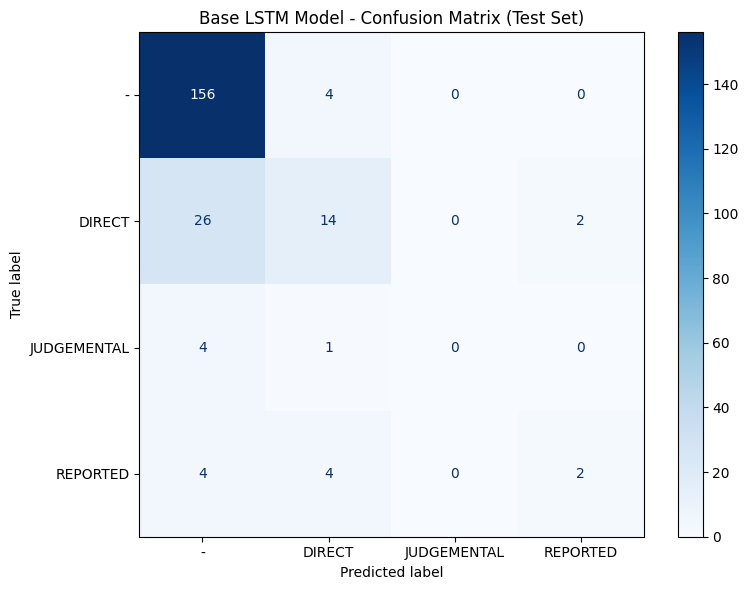

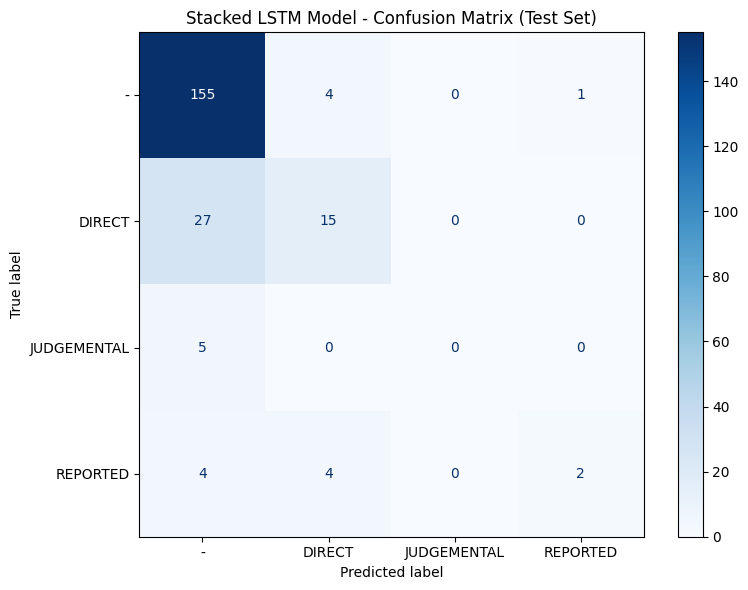

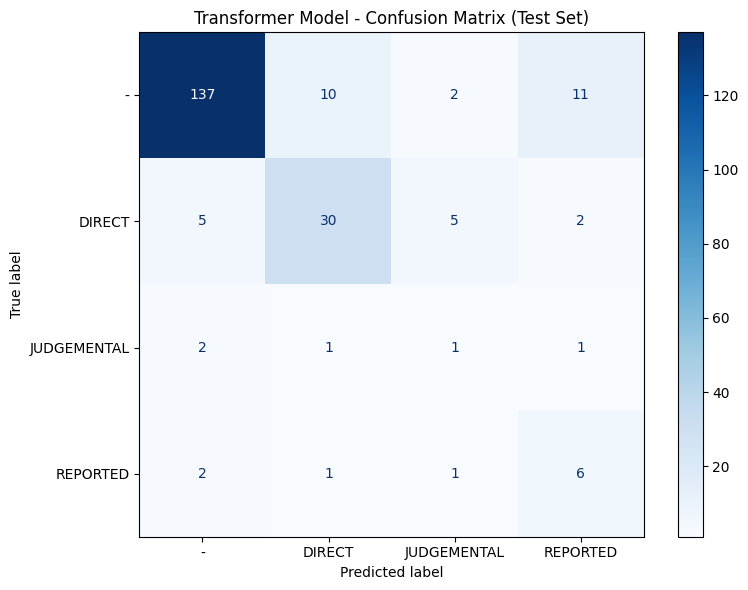

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Class names
class_names = ['-', 'DIRECT', 'JUDGEMENTAL', 'REPORTED']

# LSTM Confusion Matrix
base_lstm_cm = confusion_matrix(y_test, base_test_pred_classes)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=base_lstm_cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues')
plt.title('Base LSTM Model - Confusion Matrix (Test Set)')
plt.tight_layout()
plt.savefig('lstm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

stack_lstm_cm = confusion_matrix(y_test, stack_test_pred_classes)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=stack_lstm_cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues')
plt.title('Stacked LSTM Model - Confusion Matrix (Test Set)')
plt.tight_layout()
plt.savefig('lstm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Transformer Confusion Matrix
transformer_cm = confusion_matrix(y_test, transformer_test_pred_classes)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=transformer_cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues')
plt.title('Transformer Model - Confusion Matrix (Test Set)')
plt.tight_layout()
plt.savefig('transformer_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Per-class metrics
base_lstm_report = classification_report(y_test, base_test_pred_classes,
                                     target_names=class_names, output_dict=True)
stack_lstm_report = classification_report(y_test, stack_test_pred_classes,
                                     target_names=class_names, output_dict=True)
transformer_report = classification_report(y_test, transformer_test_pred_classes,
                                           target_names=class_names, output_dict=True)

print("="*70)
print("BASE LSTM MODEL - PER-CLASS PERFORMANCE")
print("="*70)
print(classification_report(y_test, base_test_pred_classes, target_names=class_names))

print("="*70)
print("STACKED LSTM MODEL - PER-CLASS PERFORMANCE")
print("="*70)
print(classification_report(y_test, stack_test_pred_classes, target_names=class_names))

print("\n" + "="*70)
print("TRANSFORMER MODEL - PER-CLASS PERFORMANCE")
print("="*70)
print(classification_report(y_test, transformer_test_pred_classes, target_names=class_names))

# Summary comparison
comparison_df = pd.DataFrame({
    'Class': class_names,
    'Base_LSTM_F1': [base_lstm_report[cn]['f1-score'] for cn in class_names],
    'Stack_LSTM_F1': [stack_lstm_report[cn]['f1-score'] for cn in class_names],
    'Transformer_F1': [transformer_report[cn]['f1-score'] for cn in class_names],
    'Base_LSTM_Precision': [base_lstm_report[cn]['precision'] for cn in class_names],
    'Stack_LSTM_Precision': [stack_lstm_report[cn]['precision'] for cn in class_names],
    'Transformer_Precision': [transformer_report[cn]['precision'] for cn in class_names],
    'Base_LSTM_Recall': [base_lstm_report[cn]['recall'] for cn in class_names],
    'Stack_LSTM_Recall': [stack_lstm_report[cn]['recall'] for cn in class_names],
    'Transformer_Recall': [transformer_report[cn]['recall'] for cn in class_names],
})
print("\nModel Comparison Table:")
comparison_df

BASE LSTM MODEL - PER-CLASS PERFORMANCE
              precision    recall  f1-score   support

           -       0.82      0.97      0.89       160
      DIRECT       0.61      0.33      0.43        42
 JUDGEMENTAL       0.00      0.00      0.00         5
    REPORTED       0.50      0.20      0.29        10

    accuracy                           0.79       217
   macro avg       0.48      0.38      0.40       217
weighted avg       0.75      0.79      0.75       217

STACKED LSTM MODEL - PER-CLASS PERFORMANCE
              precision    recall  f1-score   support

           -       0.81      0.97      0.88       160
      DIRECT       0.65      0.36      0.46        42
 JUDGEMENTAL       0.00      0.00      0.00         5
    REPORTED       0.67      0.20      0.31        10

    accuracy                           0.79       217
   macro avg       0.53      0.38      0.41       217
weighted avg       0.76      0.79      0.75       217


TRANSFORMER MODEL - PER-CLASS PERFORMANCE
    

,Class,Base_LSTM_F1,Stack_LSTM_F1,Transformer_F1,Base_LSTM_Precision,Stack_LSTM_Precision,Transformer_Precision,Base_LSTM_Recall,Stack_LSTM_Recall,Transformer_Recall
0,-,0.891429,0.883191,0.895425,0.821053,0.811518,0.938356,0.975000,0.968750,0.856250
1,DIRECT,0.430769,0.461538,0.714286,0.608696,0.652174,0.714286,0.333333,0.357143,0.714286
2,JUDGEMENTAL,0.000000,0.000000,0.142857,0.000000,0.000000,0.111111,0.000000,0.000000,0.200000
3,REPORTED,0.285714,0.307692,0.400000,0.500000,0.666667,0.300000,0.200000,0.200000,0.600000


In [ ]:
# Identify specific misclassified samples
base_errors = y_test != base_test_pred_classes
stack_errors = y_test != stack_test_pred_classes
transformer_errors = y_test != transformer_test_pred_classes

# All three models wrong
all_wrong = base_errors & stack_errors & transformer_errors
# Only Baseline wrong
only_base_wrong = base_errors & ~stack_errors & ~transformer_errors
# Only Stacked wrong
only_stack_wrong = ~base_errors & stack_errors & ~transformer_errors
# Only Transformer wrong
only_transformer_wrong = ~base_errors & ~stack_errors & transformer_errors
# Baseline and Stacked wrong (but not Transformer)
base_stack_wrong = base_errors & stack_errors & ~transformer_errors
# Baseline and Transformer wrong (but not Stacked)
base_transformer_wrong = base_errors & ~stack_errors & transformer_errors
# Stacked and Transformer wrong (but not Baseline)
stack_transformer_wrong = ~base_errors & stack_errors & transformer_errors

print("="*70)
print("ERROR ANALYSIS SUMMARY")
print("="*70)
print(f"Total test samples: {len(y_test)}")
print(f"\nBaseline LSTM errors: {base_errors.sum()} ({100*base_errors.sum()/len(y_test):.1f}%)")
print(f"Stacked LSTM errors: {stack_errors.sum()} ({100*stack_errors.sum()/len(y_test):.1f}%)")
print(f"Transformer errors: {transformer_errors.sum()} ({100*transformer_errors.sum()/len(y_test):.1f}%)")

print(f"\nAll three models wrong: {all_wrong.sum()}")
print(f"Only Baseline wrong: {only_base_wrong.sum()}")
print(f"Only Stacked wrong: {only_stack_wrong.sum()}")
print(f"Only Transformer wrong: {only_transformer_wrong.sum()}")
print(f"Baseline & Stacked wrong: {base_stack_wrong.sum()}")
print(f"Baseline & Transformer wrong: {base_transformer_wrong.sum()}")
print(f"Stacked & Transformer wrong: {stack_transformer_wrong.sum()}")

# Show examples of misclassified samples
print("\n" + "="*70)
print("SAMPLE: BASELINE & STACKED WRONG, TRANSFORMER RIGHT")
print("="*70)
for idx in np.where(base_stack_wrong)[0][:3]:
    print(f"\nTweet: {test['tweet'].iloc[idx][:150]}...")
    print(f"True Label: {class_names[y_test[idx]]}")
    print(f"Baseline Pred: {class_names[base_test_pred_classes[idx]]}")
    print(f"Stacked Pred: {class_names[stack_test_pred_classes[idx]]}")
    print(f"Transformer Pred: {class_names[transformer_test_pred_classes[idx]]}")

print("\n" + "="*70)
print("SAMPLE: BASELINE & TRANSFORMER WRONG, STACKED RIGHT")
print("="*70)
for idx in np.where(base_transformer_wrong)[0][:3]:
    print(f"\nTweet: {test['tweet'].iloc[idx][:150]}...")
    print(f"True Label: {class_names[y_test[idx]]}")
    print(f"Baseline Pred: {class_names[base_test_pred_classes[idx]]}")
    print(f"Stacked Pred: {class_names[stack_test_pred_classes[idx]]}")
    print(f"Transformer Pred: {class_names[transformer_test_pred_classes[idx]]}")

print("\n" + "="*70)
print("SAMPLE: STACKED & TRANSFORMER WRONG, BASELINE RIGHT")
print("="*70)
for idx in np.where(stack_transformer_wrong)[0][:3]:
    print(f"\nTweet: {test['tweet'].iloc[idx][:150]}...")
    print(f"True Label: {class_names[y_test[idx]]}")
    print(f"Baseline Pred: {class_names[base_test_pred_classes[idx]]}")
    print(f"Stacked Pred: {class_names[stack_test_pred_classes[idx]]}")
    print(f"Transformer Pred: {class_names[transformer_test_pred_classes[idx]]}")

ERROR ANALYSIS SUMMARY
Total test samples: 217

Baseline LSTM errors: 45 (20.7%)
Stacked LSTM errors: 45 (20.7%)
Transformer errors: 43 (19.8%)

All three models wrong: 17
Only Baseline wrong: 4
Only Stacked wrong: 5
Only Transformer wrong: 21
Baseline & Stacked wrong: 21
Baseline & Transformer wrong: 3
Stacked & Transformer wrong: 2

SAMPLE: BASELINE & STACKED WRONG, TRANSFORMER RIGHT

Tweet: fuck that cunt try to vote her out multiple time...
True Label: DIRECT
Baseline Pred: -
Stacked Pred: -
Transformer Pred: DIRECT

Tweet: mmm fuck that cunt be hungry for this dick isnt it such shame that you can lie all you want about not want this but your body never canhe say in her e...
True Label: DIRECT
Baseline Pred: -
Stacked Pred: -
Transformer Pred: DIRECT

Tweet: kabul islamic emirate of afghanistan have announce the end of co-education in the country cite gender harassment.female student will attend university...
True Label: REPORTED
Baseline Pred: -
Stacked Pred: -
Transformer Pred: R

CLASS DISTRIBUTION ANALYSIS
      Class  Train  Val  Test
          -   1733   90   160
     DIRECT    336   14    42
JUDGEMENTAL     42    7     5
   REPORTED     91    4    10


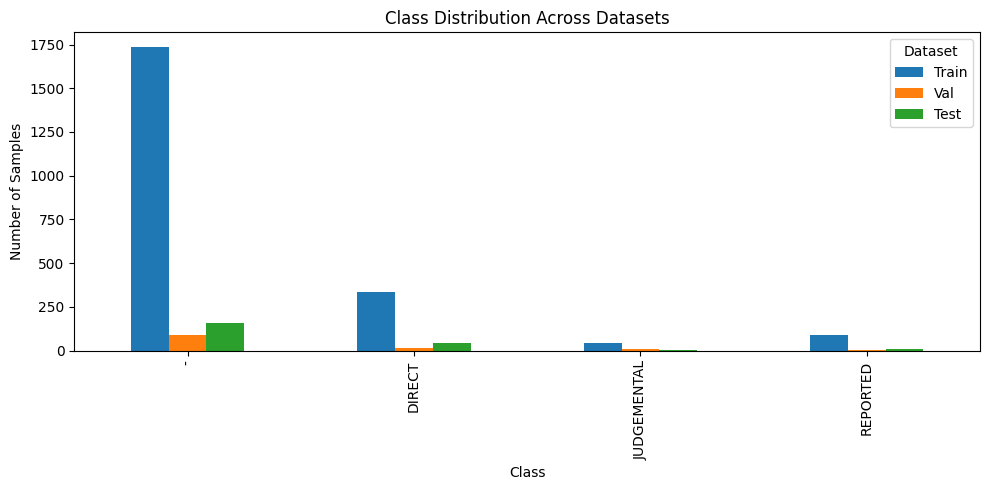


Class Distribution Percentages:
  -: 73.7%
  DIRECT: 19.4%
  JUDGEMENTAL: 2.3%
  REPORTED: 4.6%


In [ ]:
# Class distribution analysis
print("="*70)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*70)

train_dist = train['label'].value_counts().sort_index()
val_dist = val['label'].value_counts().sort_index()
test_dist = test['label'].value_counts().sort_index()

dist_df = pd.DataFrame({
    'Class': class_names,
    'Train': [train_dist.get(i, 0) for i in range(4)],
    'Val': [val_dist.get(i, 0) for i in range(4)],
    'Test': [test_dist.get(i, 0) for i in range(4)],
})

print(dist_df.to_string(index=False))

# Visualize imbalance
fig, ax = plt.subplots(figsize=(10, 5))
dist_df.set_index('Class')[['Train', 'Val', 'Test']].plot(kind='bar', ax=ax)
plt.title('Class Distribution Across Datasets')
plt.ylabel('Number of Samples')
plt.xlabel('Class')
plt.legend(title='Dataset')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Check if imbalance affects minority classes
print("\nClass Distribution Percentages:")
for i, cls in enumerate(class_names):
    test_pct = 100 * test_dist.get(i, 0) / len(test)
    print(f"  {cls}: {test_pct:.1f}%")

OOV (OUT-OF-VOCABULARY) ANALYSIS - ALL MODELS
Samples with high OOV (>5 <UNK> tokens): 20
Samples with low OOV (<=5 <UNK> tokens): 197

----------------------------------------------------------------------
ERROR RATES BY OOV LEVEL
----------------------------------------------------------------------

Baseline LSTM:
  Error rate (high OOV):  10.0%
  Error rate (low OOV):   21.8%
  Difference:             -11.8%

Stacked LSTM:
  Error rate (high OOV):  5.0%
  Error rate (low OOV):   22.3%
  Difference:             -17.3%

Transformer:
  Error rate (high OOV):  10.0%
  Error rate (low OOV):   20.8%
  Difference:             -10.8%

SUMMARY TABLE
        Model High OOV Error Rate Low OOV Error Rate OOV Impact
Baseline LSTM               10.0%              21.8%     -11.8%
 Stacked LSTM                5.0%              22.3%     -17.3%
  Transformer               10.0%              20.8%     -10.8%


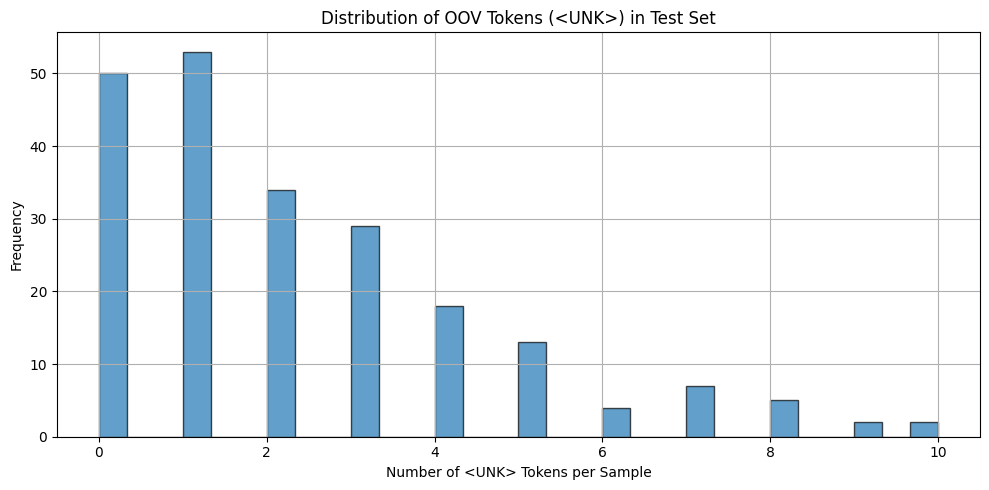


OOV Statistics:
  Average <UNK> tokens per sample: 2.29
  Max <UNK> tokens in a sample: 10
  Min <UNK> tokens in a sample: 0


In [ ]:
# OOV analysis for all three models
unk_token_idx = vocab['<UNK>']

def count_unk_in_sample(encoded_indices):
    """Count <UNK> tokens in a sample"""
    return sum(1 for idx in encoded_indices if idx == unk_token_idx)

test['unk_count'] = test['encoded_tweet'].apply(count_unk_in_sample)

# Generate predictions for all three models on test set if not already done
# Baseline model
base_test_pred = models[42]['baseline_model'].predict(test_padded, verbose=0)
base_test_pred_classes = np.argmax(base_test_pred, axis=1)

# Stacked model
stack_test_pred = models[42]['stacked_model'].predict(test_padded, verbose=0)
stack_test_pred_classes = np.argmax(stack_test_pred, axis=1)

# Transformer (already have this)
# transformer_test_pred_classes is already computed

# Compute error masks for all three models
base_errors = y_test != base_test_pred_classes
stack_errors = y_test != stack_test_pred_classes
transformer_errors = y_test != transformer_test_pred_classes

# Analyze error rate by OOV
high_oov = test['unk_count'] > 5
low_oov = test['unk_count'] <= 5

print("="*70)
print("OOV (OUT-OF-VOCABULARY) ANALYSIS - ALL MODELS")
print("="*70)
print(f"Samples with high OOV (>5 <UNK> tokens): {high_oov.sum()}")
print(f"Samples with low OOV (<=5 <UNK> tokens): {low_oov.sum()}")

# Compute error rates for each model
print("\n" + "-"*70)
print("ERROR RATES BY OOV LEVEL")
print("-"*70)

models_info = {
    'Baseline LSTM': base_errors,
    'Stacked LSTM': stack_errors,
    'Transformer': transformer_errors
}

oov_analysis = []

for model_name, error_mask in models_info.items():
    if high_oov.sum() > 0:
        error_rate_high_oov = error_mask[high_oov].sum() / high_oov.sum()
    else:
        error_rate_high_oov = 0

    if low_oov.sum() > 0:
        error_rate_low_oov = error_mask[low_oov].sum() / low_oov.sum()
    else:
        error_rate_low_oov = 0

    diff = error_rate_high_oov - error_rate_low_oov

    print(f"\n{model_name}:")
    print(f"  Error rate (high OOV):  {100*error_rate_high_oov:.1f}%")
    print(f"  Error rate (low OOV):   {100*error_rate_low_oov:.1f}%")
    print(f"  Difference:             {100*diff:.1f}%")

    oov_analysis.append({
        'Model': model_name,
        'High OOV Error Rate': f"{100*error_rate_high_oov:.1f}%",
        'Low OOV Error Rate': f"{100*error_rate_low_oov:.1f}%",
        'OOV Impact': f"{100*diff:.1f}%"
    })

# Summary table
print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)
oov_summary_df = pd.DataFrame(oov_analysis)
print(oov_summary_df.to_string(index=False))

# Visualize OOV distribution
fig, ax = plt.subplots(figsize=(10, 5))
test['unk_count'].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
plt.title('Distribution of OOV Tokens (<UNK>) in Test Set')
plt.xlabel('Number of <UNK> Tokens per Sample')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('oov_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nOOV Statistics:")
print(f"  Average <UNK> tokens per sample: {test['unk_count'].mean():.2f}")
print(f"  Max <UNK> tokens in a sample: {test['unk_count'].max()}")
print(f"  Min <UNK> tokens in a sample: {test['unk_count'].min()}")

# [Task 8 - 0.5 points] Report

Wrap up your experiment in a short report (up to 2 pages).

### Instructions

* Use the NLP course report template.
* Summarize each task in the report following the provided template.

### Recommendations

The report is **not a copy-paste** of graphs, tables, and command outputs.

* Summarize classification performance in Table format.
* **Do not** report command outputs or screenshots.
* Report learning curves in Figure format.
* The error analysis section should summarize your findings.


# Submission

* **Submit** your report in PDF format.
* **Submit** your python notebook.
* Make sure your notebook is **well organized**, with no temporary code, commented sections, tests, etc...
* You can upload **model weights** in a cloud repository and report the link in the report.

## Bonus Points
Bonus points are arbitrarily assigned based on significant contributions such as:
- Outstanding error analysis
- Masterclass code organization
- Suitable extensions

**Note**: bonus points are only assigned if all task points are attributed (i.e., 6/6).

**Possible Suggestions for Bonus Points:**
- **Try other preprocessing strategies**: e.g., but not limited to, explore techniques tailored specifically for tweets or  methods that are common in social media text.
- **Experiment with other custom architectures or models from HuggingFace**
- **Explore Spanish tweets**: e.g., but not limited to, leverage multilingual models to process Spanish tweets and assess their performance compared to monolingual models.

# FAQ

Please check this frequently asked questions before contacting us

### Trainable Embeddings

You are **free** to define a trainable or non-trainable Embedding layer to load the GloVe embeddings.

### Model architecture

You **should not** change the architecture of a model (i.e., its layers).

However, you are **free** to play with their hyper-parameters.


### Neural Libraries

You are **free** to use any library of your choice to implement the networks (e.g., Keras, Tensorflow, PyTorch, JAX, etc...)

### Robust Evaluation

Each model is trained with at least 3 random seeds.

Task 5 requires you to compute the average performance over the 3 seeds and its corresponding standard deviation.

### Expected Results

Task 2 leaderboard reports around 40-50 F1-score.
However, note that they perform a hierarchical classification.

That said, results around 30-40 F1-score are **expected** given the task's complexity.

### Model Selection for Analysis

To carry out the error analysis you are **free** to either

* Pick examples or perform comparisons with an individual seed run model (e.g., Baseline seed 1337)
* Perform ensembling via, for instance, majority voting to obtain a single model.

### Error Analysis

Some topics for discussion include:
   * Precision/Recall curves.
   * Confusion matrices.
   * Specific misclassified samples.


# The End

Feel free to reach out for questions/doubts!

# Task
Update the `compute_loss` method in `WeightedLossTrainer` to accept the `num_items_in_batch` argument and then re-run the `trainer.train()` method.

## Update `compute_loss` signature

### Subtask:
Modify the `compute_loss` method in `WeightedLossTrainer` to accept the `num_items_in_batch` argument. Since it's not used in the custom loss logic, it can be passed and ignored.


**Reasoning**:
The subtask is to modify the `compute_loss` method in `WeightedLossTrainer` to accept the `num_items_in_batch` argument. I will update the class definition to reflect this change.



**Reasoning**:
The previous code block correctly modified the `compute_loss` method signature to accept `num_items_in_batch`. Now, I will re-run the `trainer.train()` command, which should resolve the `TypeError` and start the training process.



# Task
Update the `compute_loss` method in `WeightedLossTrainer` to move `class_weights` to the same device as the input `labels` tensor, and then re-run `trainer.train()` to resolve the device mismatch error.

## Move class_weights to GPU

### Subtask:
Modify the `compute_loss` method in `WeightedLossTrainer` to ensure that `class_weights` is moved to the same device as the `labels` tensor before being passed to `CrossEntropyLoss`. This will resolve the device mismatch.


**Reasoning**:
The subtask requires moving `class_weights` to the same device as `labels` within the `compute_loss` method. I will redefine the `WeightedLossTrainer` class with this modification.



**Reasoning**:
The previous code block correctly modified the `compute_loss` method signature to accept `num_items_in_batch` and moved `class_weights` to the correct device. Now, I will re-run the `trainer.train()` command, which should resolve the device mismatch error and start the training process.

